In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/home/Titanic-Dataset.csv") #경로복사

In [3]:
#데이터 확인, 무작위 20개 샘플
print("shape:", data.shape)
data.head(20)

shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
# 결측치 확인
def missing_report(df):
  m = df.isna().sum().to_frame("missing")
  m["pct"] = m["missing"]*100/len(df)
  return m.sort_values("pct", ascending=False)

In [10]:
# 전처리
data['Embarked'] = data['Embarked'].fillna('S')
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [11]:
# 전처리 되었나 다시 무작위 샘플 확인
data.head(20)
#### Age가 더 복잡... 이상...

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [13]:
# Pclass별 생존률
data.groupby("Pclass")['Survived'].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [14]:
# 성별에 따른 생존률
data.groupby("Sex")['Survived'].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [15]:
# Pclass와 성별 생존률
pd.pivot_table(data, values="Survived", index="Pclass", columns="Sex", aggfunc="mean")

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
# 데이터 컬럼 별 null 값 합계 계산
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [18]:
# Cabin 컬럼 삭제
data.drop(columns=['Cabin'], inplace=True)

In [19]:
# 데이터 컬럼 별 null 값 합계 계산
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [24]:
# 그래프 그리기 위해 나누기
graph = data.groupby("Embarked").size()
graph

,0
Embarked,
C,168
Q,77
S,646


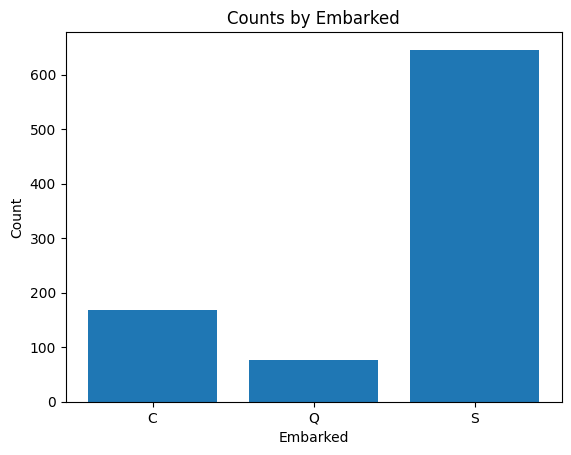

In [25]:
# 그래프 그리기
plt.bar(graph.index.astype(str), graph.values)
plt.title("Counts by Embarked")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.show()

In [26]:
# 나이 결측 평균으로 보완
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [29]:
# 나이 다 정수로 바꿈
data["Age_int"] = data["Age"].astype(int)

In [30]:
# 나이별 평균 생존률
age_surv = data.groupby("Age_int")["Survived"].mean()

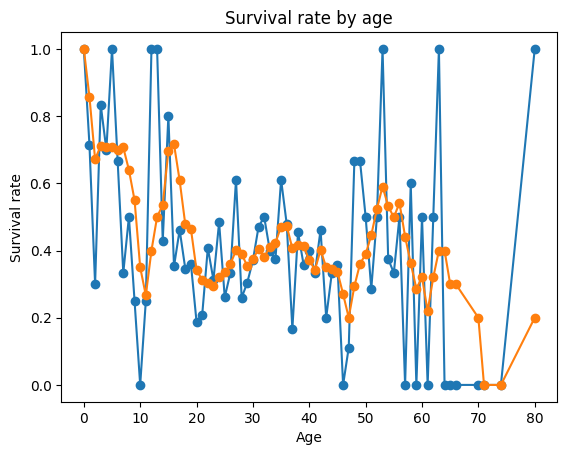

In [32]:
# 이동평균 그래프도 그려보기
A = age_surv.rolling(window=5, min_periods=1).mean()

plt.figure()
plt.plot(age_surv.index, age_surv.values, marker='o', label='by age')
plt.plot(A.index, A.values, marker='o', label='A')
plt.title('Survival rate by age')
plt.xlabel('Age')
plt.ylabel('Survival rate')
plt.show()